# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

Generated Line
[0.34906801213804994, 0.6648216227582144, 0.6707536917539988]


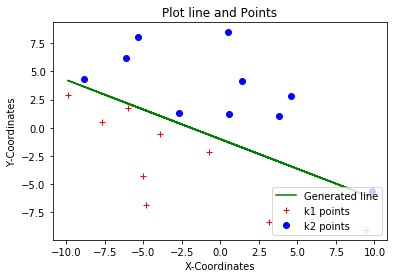

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plotLineAndPoints(l1, l2, *l3):
    
        ### Your code goes here
    if(len(l3)!=0):
        v = []
        n = list(l3[0])
        u = [i[0] for i in l1]+[i[0] for i in l2] #Taking values for u to plot u and v
        for j in u:
            v.append((-n[2]-(n[0]*j))/n[1])
        plt.plot(u,v,'g',label='Generated line') # To plot line equation
    
    plt.plot(*zip(*l1),'r+',label='k1 points') # To plot the points
    plt.plot(*zip(*l2),'bo', label='k2 points')
    plt.legend(loc='lower right')
    plt.xlabel("X-Coordinates")
    plt.ylabel("Y-Coordinates")
    plt.title("Plot line and Points")
    

def generate_dataset(k1, k2):
    l1 = []
    l2 = []
    a = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    c = np.random.uniform(0,1)
    print("Generated Line")
    print([a,b,c])
    while(len(l1)<k1 or len(l2)<k2):
        x1 = np.random.uniform(-(k1+k2)/2,(k1+k2)/2)
        y1 = np.random.uniform(-(k1+k2)/2,(k1+k2)/2)
        if (((a*x1)+(b*y1)+c)<0 and len(l1) < k1):
            l1.append((x1,y1))
        if (((a*x1)+(b*y1)+c)>0 and len(l2) < k2):
            l2.append((x1,y1))
    plotLineAndPoints(l1,l2,(a,b,c))
    X1 = np.append(np.array([i[0] for i in l1]),np.array([i[0] for i in l2]))
    X2 = np.append(np.array([i[1] for i in l1]),np.array([i[1] for i in l2]))
    Y1 = np.array([-1 for i in range(0,k1)])
    Y2 = np.array([1 for i in range(0,k2)])
    X = np.column_stack((X1,X2))
    Y = np.append(Y1,Y2)
    return X,Y
X,y = generate_dataset(10,10)

### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





Generated Line
[0.4842742865831534, 0.8489735933926755, 0.04179202273504701]
Predicted line is
(38.399731629992054, 87.37512318391781, 40.70064196078145)


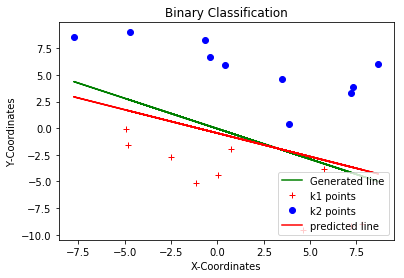

In [26]:
def fit(X, y):
    """
    Your code for Task 2 goes here. Apart from writing the fit function,
    you should also write code to not plot the points in the dataset,
    but also plot the learned line represented by w. We will test this, by running 
    the cell for task 1 (thus generating a new dataset) and then running this cell.
    Even though the visualization of done for d=3 and 2-D points, your code should be
    generic and be able to handle any d. This will also be tested.
    """
    Col_1 = [1 for i in range(0,X.shape[0])]
    X = np.column_stack((Col_1,X))
    d = X.shape[1]
    w = np.random.uniform(0,100,d)
    count = 0
    while(count < y.size):
        count = 0
        for i in range(0,X.shape[0]):
            
            if(np.dot(X[i,:],w) < 0 and y[i] != -1):
                #mis-classified
                w = w + X[i,:]*y[i]
            elif(np.dot(X[i,:],w) > 0 and y[i] != 1):
                #misclassified
                w = w + X[i,:]*y[i]
            else:
                #correctly classified
                count +=1
    s1 = []
    s2 = []
    for i,j in zip(X,y):
        if(j == -1):
            s1.append((i[1],i[2]))
        elif (j==1):
            s2.append((i[1],i[2]))
    if(d==3):
        w1 = tuple((w[1],w[2],w[0])) #Need to change here for d to function.
        print("Predicted line is")
        print(w1)
        v = []
        n = list(w1)
        u = [i[0] for i in s1]+[i[0] for i in s2] #Taking values for u to plot u and v
        for j in u:
            v.append((-n[2]-(n[0]*j))/n[1])
        plt.plot(u,v,'r',label='predicted line')
        plt.legend(loc='lower right')
        plt.title("Binary Classification")
    else:
        m = w[1:]
        m.append(w[0])
        print(m)
        print("d is for higher order cannot plot the graph")
X,y = generate_dataset(10,10)    
fit(X, y)

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.



### Answer:
The intuition behind this is as follows:
A neuron accepts input signals through its dendrites, which pass the electrical signal down to the cell body.
In a similar fashion the algorithm takes the training data into consideration, and calculates the weights based on "y(-1,1)".
Weights give the strength of the node and the incements$(y.x)$ provides the activation needed inorder to move the line(linear classification) up or down. So the activation function here is a step function which decides the shift of line.







### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

### Answer:
When the data is not linearly seperable the data is transformed using some nonlinear function so the resulting transformed points become linearly separable. Again we use the perceptron (updating the weights based on inputs) to find the classifying line.

## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

In [27]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [28]:
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    m = y.size
    cos = (y- np.dot(X,theta))**2
    cost = sum(cos)*0.5*(1/m)
    return cost

In [29]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(0, num_iters):
        J_history[i] = cost_function(X, y, theta)
        theta = theta - (learning_rate*(1/m)*(np.dot((np.dot(theta,X.T)-y),X)))

    return theta, J_history

In [30]:
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    theta = np.zeros((X.shape[1], 1))
    theta = np.dot(np.linalg.inv(np.matmul(X.T,X)),np.dot(X.T,y))
    return theta

In [31]:
# load dataset
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target

In [32]:
# Normalize features
print('Normalizing Features ...')
m  = y.size
X, mu, sigma = feature_normalization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Theta computed from gradient descent : 
[22.53269111 -0.80153942  0.86697613 -0.23056994  0.73597162 -1.70194762
  2.83315488 -0.08096679 -2.85876596  1.61270393 -1.01025156 -1.97669241
  0.8702363  -3.67513307]
Time taken for Gradient descent
0.13385796546936035


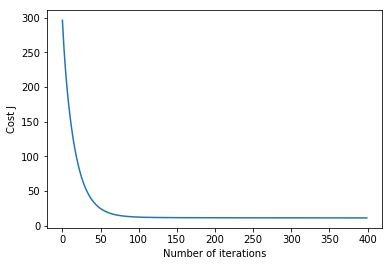

In [33]:
# Now we proceed with Gradient Descent
import time

t1 = time.time()
print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))
t2 = time.time()
print("Time taken for Gradient descent")
print(t2-t1)

In [35]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target

X = np.c_[np.ones(m), X] # Add intercept term to X
t3 = time.time()
theta = linearRegression_ols(X, y)

# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))
t4 = time.time()
print("Time Taken for OLS")
print(t4-t3)

Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]
Time Taken for OLS
0.0031549930572509766


Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [36]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu)/sigma
    
    return X_norm, mu, sigma

In [37]:
def cost_function_regularization(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    m = y.size
    cost = 0
    cos1 = (y- np.dot(theta,X.T))**2
    cos2 = (lamba * sum(theta**2))
    cost = (sum(cos1)+cos2)/(2*m)
    return cost

In [38]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)


    for i in range(0, num_iters):
        J_history[i] = cost_function_regularization(X, y, theta)
        theta = theta - np.append(0,theta[1:])*((learning_rate*lamba)/m) - (learning_rate*(1/m)*(np.dot((np.dot(theta,X.T)-y),X)))

    return theta, J_history

In [39]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
lamba = 10 #Choose the tuning parameter

In [40]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Theta computed from gradient descent : 
[22.53269111 -0.77509531  0.81617804 -0.261192    0.740277   -1.57041464
  2.8470116  -0.09653812 -2.67972817  1.46054165 -0.93116664 -1.93293722
  0.8619596  -3.5798556 ]


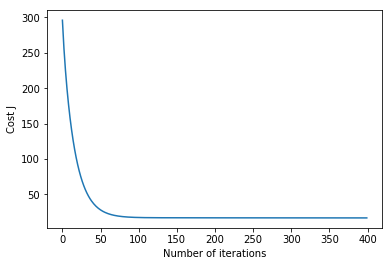

In [41]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

## Difference between the Ordinary Least Squares and Gradient Descent:
As shown in above cells, the OLS is running faster compared to the Gradient Descent, as the OLS is matrix multiplication.
But for if the samples are more, then it will run slower as the complexity is $O(n^3)$. Where as the Gradient Descent, has the value of learning rate with which we take baby steps to reach the global minimum. So we need to adjust the value of the learning rate accordingly(higher the value, more is the step taken and we may skip the global minimum. ) to reach the global minimum.

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

Methodology followed:
Implemented Ordinary Least square method to predict the output and also using the linear regression module of Scikit Learn, got almost the same parameters. The mean square error is also calculated and shown below.

In [42]:
## Code for function 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import csv
f = open("data1.csv", "r")
data_1 = list(csv.reader(f))
data1 = np.array((data_1))
col1 = [0,1,2,3,4]
X1 = data1[:,col1]
Y1 = data1[:,5]
X1 = X1.astype(float)
Y1 = Y1.astype(float)
X1 = np.c_[np.ones(Y1.size), X1]
theta = np.zeros(X1.shape)

theta = linearRegression_ols(X1, Y1)
print('Theta computed from OLS linear regression : \n{}'.format(theta))

# Implementation using Scikit tools Linear Regression
lm = linear_model.LinearRegression(fit_intercept = False)
lm.fit(X1,Y1)
y_pred = lm.predict(X1)
#Coefficients
theta = pd.DataFrame(lm.coef_)
print(theta)
#Y_Predicted
print(y_pred)
#Mean Square error is calculated
mse = mean_squared_error(Y1, y_pred)
print(mse)


Theta computed from OLS linear regression : 
[ 1.20000029e+01  1.99995628e+00 -3.99993699e+00 -5.31525148e-05
  4.00005227e+00 -9.35192924e-05]
           0
0  12.000003
1   1.999956
2  -3.999937
3  -0.000053
4   4.000052
5  -0.000094
[ 8.31815242e+00  1.90519771e+01  9.09815913e-01  1.37858174e+01
  1.08778391e+01  8.08575624e+00  1.79639032e+01  1.38841402e+01
  8.23412131e+00  1.20821228e+01  7.19401496e+00  9.09019601e+00
  9.62801586e+00  8.51403192e+00  2.32299314e+01  8.20387257e+00
  1.26479879e+01  2.06204708e+00  1.10259002e+01  4.27807289e+00
  2.11739712e+01  2.08162207e+01  2.09379227e+01  1.94358059e+01
  5.61795561e+00  5.34388970e+00  8.96581772e+00  3.43595977e+00
 -1.54587865e+00  1.18941322e+01  1.05360460e+01  1.16559158e+01
  9.76990029e+00  2.07979899e+01  1.47120085e+01  1.14662343e+01
  6.74380308e+00  7.31593215e+00  1.64039167e+01  8.46991777e+00
  1.24677351e+01  8.50784781e+00  7.05593076e+00  1.39601563e+01
  1.21219330e+01  1.18540315e+01  1.22178777e+01  

### Methodology and answer for function 2



Implemented the Linear regression (sklearn tools). 
First 1024 combinations are generated using the iter loops to accomodate the 5 features and (0,1,2,3) orders.
Then the X and y are passed to the linear regression model, where the y_predicted is calculated.
Mean Square Error is also calculated. y_predicted is approximately equal to y.

In [43]:
## Code for function 2
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import itertools as it
import matplotlib.pyplot as plt
import csv
g = open("data2.csv", "r")
data_2 = list(csv.reader(g))
data2 = np.array((data_2))
col2 = [0,1,2,3,4]
X2 = data2[:,col2]
Y2 = data2[:,5]
X2 = X2.astype(float)
Y2 = Y2.astype(float)



X_2 = np.ones(X2.shape[0])


p = []
for i in it.product([0,1,2,3], repeat = 5):
    X_2 = np.c_[(X_2,(X2[:,[0]]**i[0])*(X2[:,[1]]**i[1])*(X2[:,[2]]**i[2])*(X2[:,[3]]**i[3])*(X2[:,[4]]**i[4]))]
    p.append(i)

X_2 = X_2[:,1:]


lm = linear_model.LinearRegression(fit_intercept = False)
lm.fit(X_2,Y2)
y_pred = lm.predict(X_2)
#Coefficients
theta = pd.DataFrame(lm.coef_)
print(theta)
#Corresponding powers of X1,X2,X3,X4,X5
print(p)
#Y_Predicted
print(y_pred)
#Mean Square error is calculated
mse = mean_squared_error(Y2, y_pred)
print(mse)

              0
0     41.999830
1      0.000219
2      0.000591
3      0.000930
4      0.000226
5     -1.000947
6     -0.003346
7      0.000034
8     -2.999864
9      0.000198
10     0.000550
11    -0.001948
12     0.999734
13     0.000829
14     0.003376
15     0.001502
16    -0.000581
17     0.000142
18    -0.001097
19    -0.001374
20    -0.000164
21    -0.000694
22    -0.000660
23    -0.000930
24     0.001300
25     0.003840
26     0.005350
27     0.001823
28     0.000220
29    -0.001948
...         ...
994    0.024188
995   -0.005731
996   -0.004555
997    0.000441
998   -0.005680
999   -0.010990
1000  -0.014423
1001   0.039035
1002   0.065645
1003   0.030692
1004  -0.007470
1005   0.015165
1006   0.054690
1007  -0.000863
1008   0.004051
1009  -0.044402
1010   0.036680
1011   0.056170
1012   0.025322
1013   0.055601
1014  -0.061995
1015  -0.005583
1016  -0.026675
1017   0.064969
1018  -0.093842
1019  -0.024402
1020  -0.015911
1021  -0.073011
1022   0.080032
1023  -0.105615

[1024 r